# Essais de représentation 3D de terrain et d'animations climatiques en Python

### 1° Importation des librairies (opencv, matplotlib, numpy,...)

In [1]:
import sys, os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib notebook

### 2° Traitement d'une image du relief de la France

In [2]:
# ouverture de l'image
img2 = cv2.imread("france_map_2.jpg")#france_map_2
# conversion en image de niveaux de gris
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

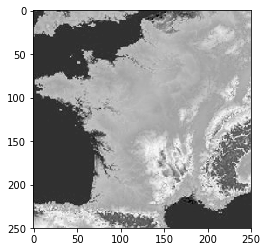

In [3]:
plt.imshow(gray2, cmap="gray") #affichage de l'image en niveau de gris
plt.show()

In [4]:
# création des grilles 2D représentant les axes X et Y qui seront utilisés pour le plot 3D
x2 = range(gray2.shape[0])
y2 = range(gray2.shape[1])
X, Y = np.meshgrid(x2, y2) # meshgrid pour faire des matrices 2D au lieu de listes 1D

In [5]:
# Traitement des données d'altitude : conversion de la couleur (niveau de gris) en une valeur d'altitude
# 1) On transpose l'image pour qu'elle soit dans le bon sens 
data_print = gray2.T
# 2) on normalise entre 0 et 1 les valeurs pour ne pas avoir trop d'écart (niveaux de gris de 0 à 255)
min_d = data_print.min()
max_d = data_print.max()
data_print = data_print - min_d
data_print = data_print/(max_d-min_d)
data_print = data_print*0.5 #on réduis encore un peu l'échelle

### 3° Affichage de la surface 3D correspondant aux données traitées :

<IPython.core.display.Javascript object>


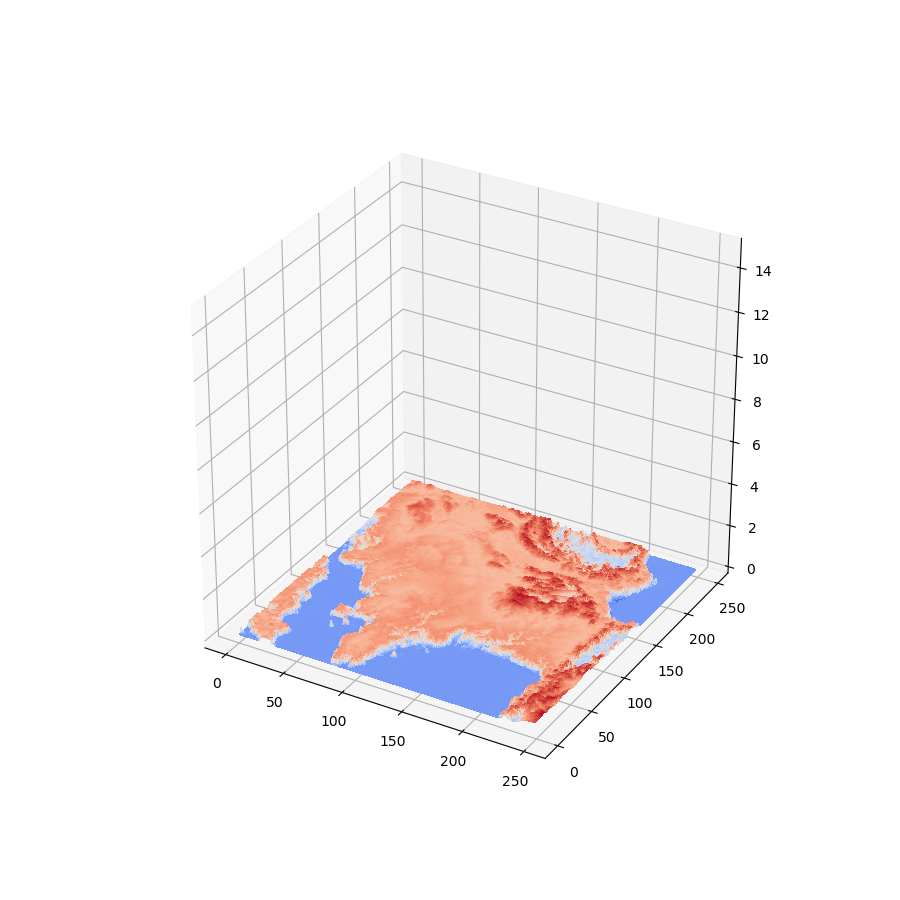

In [7]:
%matplotlib notebook
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 15)
surf = ax.plot_surface(X,Y,data_print, cmap=cm.coolwarm,linewidth=0,rstride = 1, cstride=1, antialiased=False)
#affichage lent, on peut mettre une plus grande valeur que "rstride = 1, cstride=1" pour aller plus vite
plt.show()

<IPython.core.display.Javascript object>


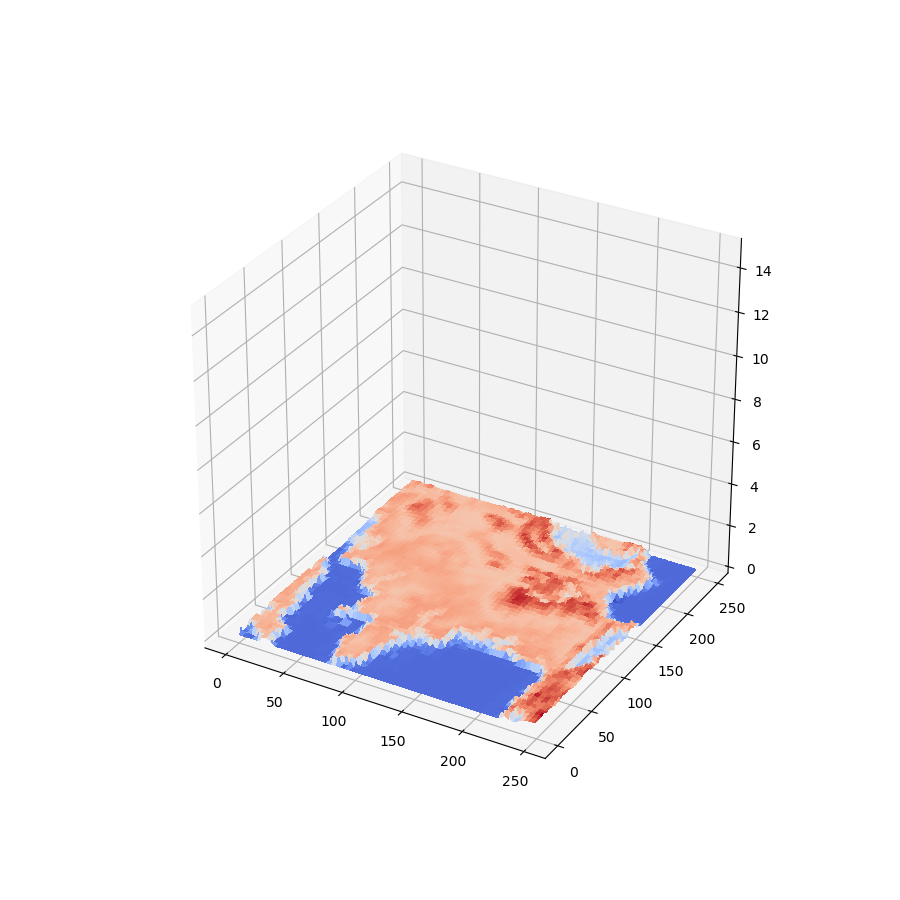

In [8]:
#version plus rapide mais moins bonne résolution :

%matplotlib notebook
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(0, 15)
surf = ax.plot_surface(X,Y,data_print, cmap=cm.coolwarm,linewidth=0,rstride = 4, cstride=4, antialiased=False)
plt.show()

### 4° Création d'une animation de pluie 

<IPython.core.display.Javascript object>


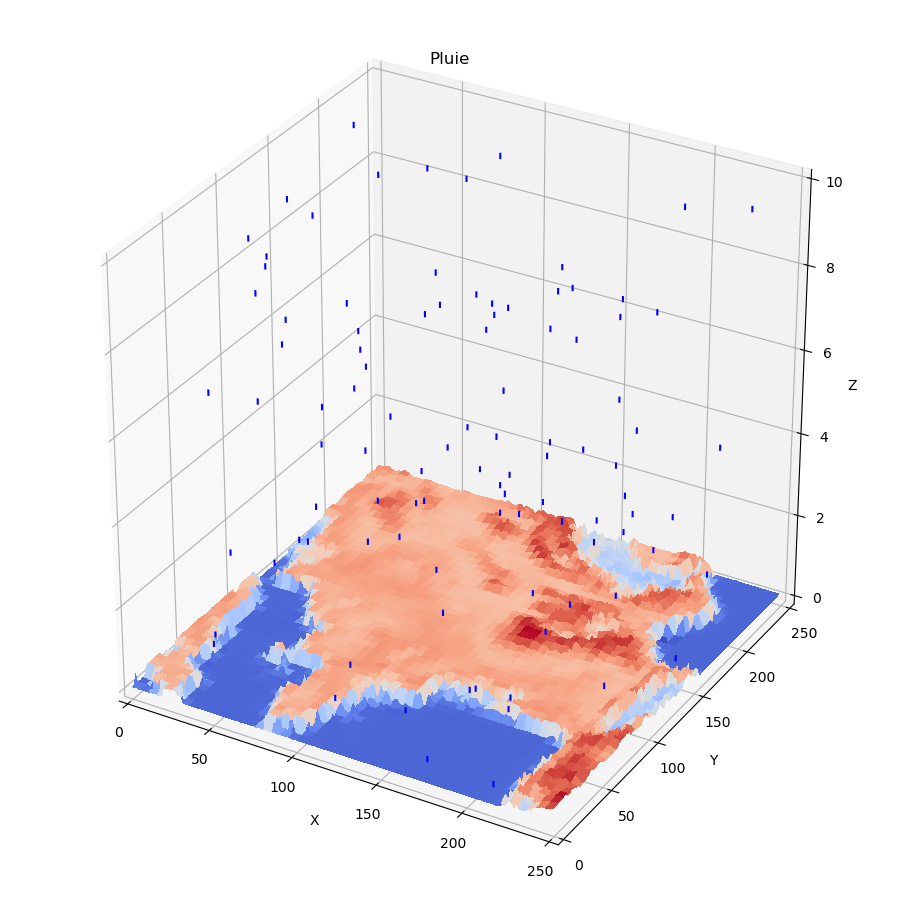

In [9]:
#pluie sur toute la france
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
%matplotlib notebook

def Gen_RainLine(length, dims=2):
    """
    Créé des lignes représentant le trajet des gouttes de pluie
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)*[250,250,0]+np.array([0,0,10])*np.random.rand()
    for index in range(1, length):
        step = np.array([0,0,-0.1]) #*(np.random.rand()+1)
        if lineData[2,index - 1] + step[1] >0 :
            lineData[:, index] = lineData[:, index - 1] + step
        else:
            lineData[:, index] = lineData[:, index -1 ]

    return lineData


def update_lines(num, dataLines, lines):
    """
    Méthode qui définit ce qui doit être affiché à chaque pas de temps de l'animation.
    Affiche une portion de chaque ligne, correspondant à la position actuelle de chaque goutte
    """
    i = num-2
    if(i<0):
        i=0
    for line, data in zip(lines, dataLines):
        line.set_data(data[0:2, i:num])
        line.set_3d_properties(data[2, i:num])
    return lines

# Création de l'environnement 3D de la figure
fig = plt.figure(figsize=(9,9))
ax = p3.Axes3D(fig)

# génère 100 gouttes de pluie
data = [Gen_RainLine(40, 3) for index in range(100)]

# Création des lignes correspondant (zorder = 10 pour résoudre un bug de superposition du à matplotlib)
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1], c='b', zorder=10)[0] for dat in data]

# Propriétés et bornes de chaque axe :
ax.set_xlim3d([0.0, 250.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 250.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 10.0])
ax.set_zlabel('Z')

ax.set_title('Pluie')

# Creation de l'animation
line_ani = animation.FuncAnimation(fig, update_lines, frames=40, fargs=(data, lines), interval = 10, blit=False)

# On ajoute la surface (relief de la france)
surf = ax.plot_surface(X,Y,data_print, cmap=cm.coolwarm,linewidth=0,rstride = 5, cstride=5, antialiased=False, zorder=0)
#Les performances étant mauvaises, on réduit la qualité de la texture du relief de la france pour éviter le lag
# (on sous-échantillonne le relief à 1 point sur 5 pour alléger les traitements)

plt.show()

### Conclusion : matplotlib est très limité (qualité des surfaces, nombre d'éléments à animer) et va limiter trop rapidement le projet. Il vaut mieux essayer un vrai moteur 3D, tel que Python Panda3D.